# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [341]:
import pandas as pd
import datetime

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [342]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [343]:
print(f"There are {df.shape[0]} rows")
print(df.dtypes)

There are 30000 rows
Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [344]:
"""
Each row represents a dog that has a current, valid dog license.
"Application Date" lists when the dog applied for a dog license, "Licensed Issue Date" is when the license was issued,
and "License Expired Date" is when the license will expire.
"Spayed or Neutered" represents whether the dog is either spayed or neutered
"""

'\nEach row represents a dog that has a current, valid dog license.\n"Application Date" lists when the dog applied for a dog license, "Licensed Issue Date" is when the license was issued,\nand "License Expired Date" is when the license will expire.\n"Spayed or Neutered" represents whether the dog is either spayed or neutered\n'

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [345]:
"""
1. Are specific breeds more likely to be neutered or spayed?
2. What zip codes are most represented? Does this reflect higher dog ownership per capita?
3. What is the gender ratio of the dogs? Does this say anything about people's gender preference for their dogs?
4. What is the age distribution of these dogs?
"""

"\n1. Are specific breeds more likely to be neutered or spayed?\n2. What zip codes are most represented? Does this reflect higher dog ownership per capita?\n3. What is the gender ratio of the dogs? Does this say anything about people's gender preference for their dogs?\n4. What is the age distribution of these dogs?\n"

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:xlabel='Primary Breed'>

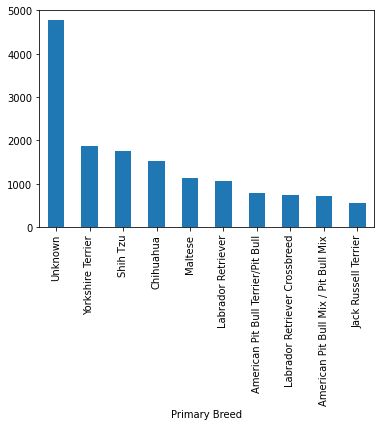

In [346]:
df.groupby(by='Primary Breed').size().sort_values(ascending=False).head(n=10).plot.bar()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:xlabel='Primary Breed'>

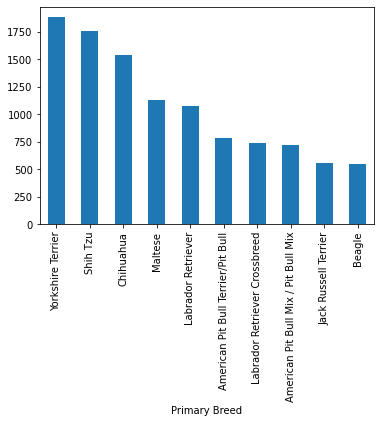

In [347]:
df[df['Primary Breed'] != 'Unknown'].groupby(by='Primary Breed').size().sort_values(ascending=False).head(n=10).plot.bar()

## What are the most popular dog names?

In [348]:
df.groupby(by='Animal Name').size().sort_values(ascending=False).head(n=20)

Animal Name
UNKNOWN     203
Max         202
Unknown     197
Bella       193
Charlie     172
Lola        146
Rocky       140
Lucy        128
Coco        114
Buddy       113
Lucky       106
Daisy        90
Lily         88
Princess     86
Bailey       83
Luna         81
Molly        81
Toby         79
Oliver       79
Chloe        78
dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [349]:
vincent_dogs = df[df['Animal Name'] == 'Vincent']
max_dogs = df[df['Animal Name'] == 'Max']
maxwell_dogs = max_dogs = df[df['Animal Name'] == 'Maxwell']

print(f"The number of dogs named Vincent is: {vincent_dogs.shape[0]}")
print(f"The number of dogs named Max is: {max_dogs.shape[0]}")
print(f"The number of dogs named Maxwell is: {maxwell_dogs.shape[0]}")

The number of dogs named Vincent is: 5
The number of dogs named Max is: 11
The number of dogs named Maxwell is: 11


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [350]:
guard_percentage = round(df['Guard or Trained'].value_counts(normalize=True)[1] * 100, 3)
print(f"The percentage of dogs that are guard dogs is {guard_percentage}%")

The percentage of dogs that are guard dogs is 0.086%


## What are the actual numbers?

In [351]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [352]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [353]:
df['Guard or Trained'] = df['Guard or Trained'].fillna("No")
df['Guard or Trained'].value_counts(dropna=False)

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [354]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts(ascending=False)

Unknown                       5
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [355]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [356]:
# Calculate age using date that the data was published
df['age'] = datetime.datetime(2016, 4, 28).year - df['year']
df['age'].mean()

6.712433333333333

# Joining data together

In [357]:
df_zip = pd.read_csv('zipcodes-neighborhoods.csv')

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [358]:
joined_df = df.merge(df_zip, left_on='Owner Zip Code', right_on='zip')

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [359]:
bronx_dog_names = joined_df[(joined_df['borough'] == 'Bronx') & (joined_df['Animal Name'] != 'Unknown')]['Animal Name'].value_counts()
print(f"The most popular dog name that is not Uknown in the Bronx is {bronx_dog_names.index[0]}")

brooklyn_dog_names = joined_df[(joined_df['borough'] == 'Brooklyn') & (joined_df['Animal Name'] != 'Unknown')]['Animal Name'].value_counts()
print(f"The most popular dog name that is not Unkown in Brooklyn is {brooklyn_dog_names.index[0]}")

upper_east_side_dog_names = joined_df[(joined_df['neighborhood'] == 'Upper East Side') & (joined_df['Animal Name'] != 'Unknown')]['Animal Name'].value_counts()
print(f"The most popular dog name that is not Unknown in The Upper East Side is {upper_east_side_dog_names.index[0]}")

The most popular dog name in the Bronx is Bella
The most popular dog name in Brooklyn is Max
The most popular dog name in The Upper East Side is Charlie


## What is the most common dog breed in each of the neighborhoods of NYC?

In [400]:
excluding_unknown = joined_df[joined_df['Primary Breed'] != 'Unknown']
excluding_unknown.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0, group_keys=False).nlargest(1)

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed? Male or female?

In [361]:
female_dogs = joined_df[joined_df['Animal Gender'] == 'F']
female_spayed_breed = female_dogs.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).reset_index(name='Rate')
print(female_spayed_breed[female_spayed_breed['Spayed or Neut'] == 'No'].sort_values(by='Rate', ascending=False).head(n=20))

male_or_female = joined_df[(joined_df['Animal Gender'] == 'F') | (joined_df['Animal Gender'] == 'M')]
gender_spayed_neutered = male_or_female.groupby('Animal Gender')['Spayed or Neut'].value_counts(normalize=True).reset_index(name='Rate')
print(gender_spayed_neutered[gender_spayed_neutered['Spayed or Neut'] == 'No'].sort_values(by='Rate', ascending=False))

                           Primary Breed Spayed or Neut      Rate
0                          Affenpinscher             No  1.000000
219  Mastiff, French (Dogue de Bordeaux)             No  1.000000
97                       Chinese Crested             No  1.000000
141                       Dogo Argentino             No  1.000000
149                  English Toy Spaniel             No  1.000000
157                       French Spaniel             No  1.000000
173           Greater Swiss Mountain Dog             No  1.000000
192                    Karelian Bear Dog             No  1.000000
196                        Kooikerhondje             No  1.000000
59                                Borzoi             No  1.000000
223                     Mastiff, Tibetan             No  1.000000
259                         Polish Hound             No  1.000000
337            Treeing Tennessee Brindle             No  1.000000
203                    Lagotto Romagnolo             No  0.750000
79        

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [362]:
import numpy as np

joined_df['monochrome'] = np.where(
    (joined_df['Animal Dominant Color'].isin(['BLACK', 'WHITE', 'GREY'])) &
    ((joined_df['Animal Secondary Color'].isin(['BLACK', 'WHITE', 'GREY'])) | (joined_df['Animal Secondary Color'].isna())) &
    ((joined_df['Animal Third Color'].isin(['BLACK', 'WHITE', 'GREY'])) | (joined_df['Animal Secondary Color'].isna())),
    True, 
    False
)
joined_df['monochrome'].value_counts()

False    27055
True      2518
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:xlabel='borough'>

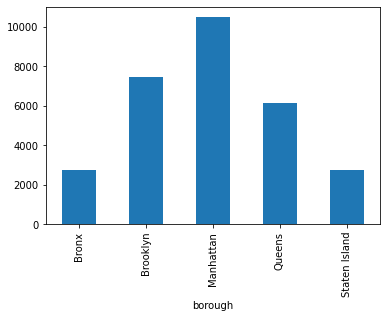

In [363]:
joined_df.groupby('borough').size().plot.bar()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [364]:
population_df = pd.read_csv('boro_population.csv')
final_joined_df = joined_df.merge(population_df, left_on='borough', right_on='borough')

borough_dog_num = final_joined_df.groupby('borough').size()
borough_population = final_joined_df.groupby('borough')['population'].mean().array
highest_borough = (borough_dog_num / borough_population).sort_values(ascending=False).reset_index().head(n=1).set_index('borough').index[0]

print(f"The borough with the highest number of dogs per capita is {highest_borough}")

The borough with the highest number of dogs per capita is Manhattan


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot:xlabel='borough,Primary Breed'>

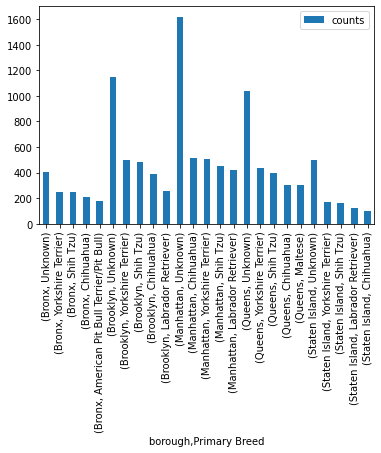

In [390]:
final_joined_df.groupby('borough')['Primary Breed'].value_counts().groupby(level=0, group_keys=False).nlargest(5).to_frame(name='counts').plot.bar()

## What percentage of dogs are not guard dogs?

In [366]:
not_guard_percentage = round(df['Guard or Trained'].value_counts(normalize=True)[0] * 100, 2)

print(f"The percentage of dogs that are not guard dogs is: {not_guard_percentage}%")

The percentage of dogs that are not guard dogs is: 99.94%
